## Replication for "Asymmetry by Design", July 19, 2021
### By Adam Goldstein and Charlie Eaton

### Figure 2: Multi-brand strategy by degree field and among 100 largest firms

In [1]:
*ssc install gr0070

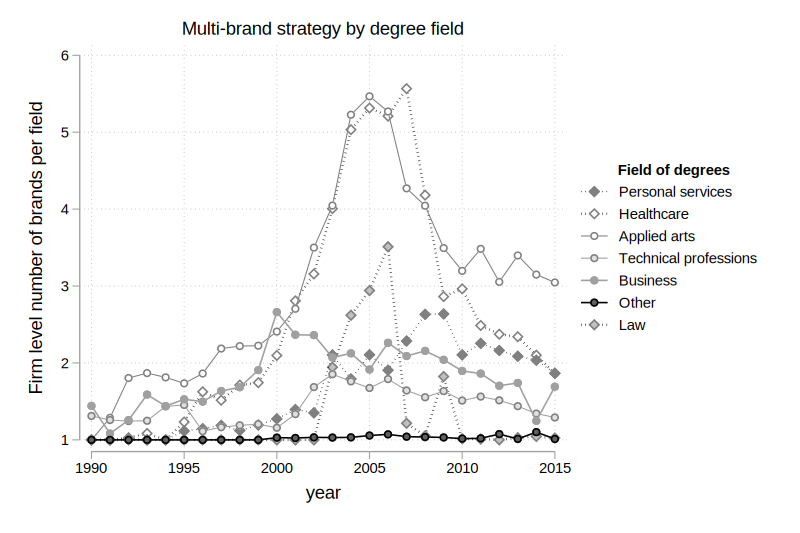

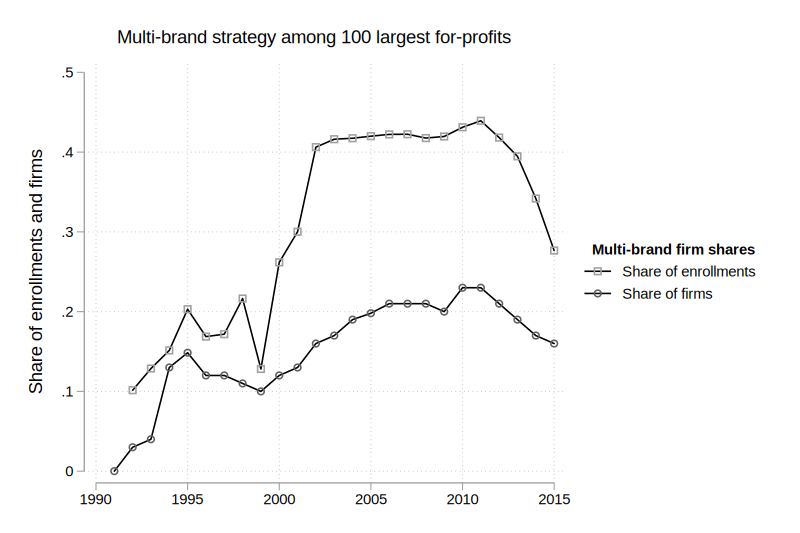

In [3]:
quietly {
set scheme plotplain
est clear

quietly use data/d_unitidasymmetry, clear

collapse (rawsum) type_* (mean) _brands* [aweight=all_under], by (year)

drop if year>2015 | year<1990

foreach var in _brands { 
label var `var'type_health "Healthcare"
label var `var'type_law "Law"
label var `var'type_culinarycosmetic "Personal services"
label var `var'type_arts "Applied arts"
label var `var'type_tech "Technical professions"
label var `var'type_biz "Business"
label var `var'type_other "Other"
}

graph tw (connect _brandstype* year, sort msym(D D D O O O O O) ///
	mc(gs8 gs8 gs8 gs8 gs8 gs10 black black) ///
	mfc(white gs12 gs8 white gs14 gs10 gs6 black) ///
	lp(dot dot dot l l l l l) lc(black black black gs8 gs10 gs10 black black) ///
	lw(medthick medthick medthin thin thin)), ///
	legend(size(small) pos(3) order(3 1 4 5 6 7 2) ///
	subtitle("{bf:Field of degrees}", size(small))) ///
	ytitle("Firm level number of brands per field") ///
	title("Multi-brand strategy by degree field") ///
	name(brands_per_field_firm_over_time, replace) xlab(1990(5)2015)

quietly use data/d_unitidasymmetry, clear
drop if year>2015 | year<1990
    
collapse (first) system_under systemnm multi_brand , by(systemid year)
bys year: egen sizerank= rank (system_under), field
gsort sizerank year

keep if sizerank<101
bysort year: egen enrollmentyr=total(system_under)
bysort year multi_brand: egen multibrandenrollement=total(system_under)
gen multiweighted=multibrandenrollement/enrollmentyr if multi_brand==1
collapse (mean) multi_brand (max) multiweighted, by (year)

label var multiweighted "Share of enrollments"
label var multi_brand "Share of firms"

graph twoway (connected multi_brand year) (connected multiweighted year) if year>1990, ///
xtitle("", size(zero)) ///
ylabel(0(.1).5) legend(size(small) subtitle("{bf:Multi-brand firm shares}",size(small)) rows(2) pos(3) order(2 1)) ///
title("Multi-brand strategy among 100 largest for-profits", ///
xoffset(-2) size(medsmall) margin(medsmall)) ytitle("Share of enrollments and firms") ///
name(hundredlargest, replace)

quietly graph combine brands_per_field_firm_over_time hundredlargest, ///
col(1) xsize(7) ysize(9) xcommon imargin(zero)
    
quietly graph export "figures/f2_multibrand_by_degree_firm_share.pdf", replace

}